In [ ]:
#importing packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
#Loading data
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Checking shape
X_train.shape

(60000, 28, 28)

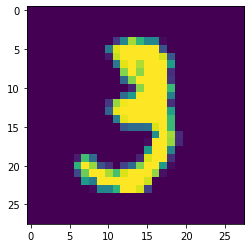

In [ ]:
#Plotting the image
plt.imshow(X_train[10])
plt.show()

In [ ]:
#Checking the  shape of y_train
y_train.shape

(60000,)

In [ ]:
X_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#Flattening our matrix to a vector of input_shape 784
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [ ]:
#Flattening our test data
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train[5]

2

In [ ]:
#Converting it into a matrix
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
#Normalization of the X_train and X_test : Now pixel intensity values will change from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Defining the type of model
model = Sequential()

In [ ]:
#Building the model
model.add(Dense(64,activation='relu',input_shape = (784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#Getting the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model by giving the Loss Function and the type of optimizer you need
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Train the data
history=model.fit(X_train,y_train,batch_size = 200, epochs=10)

Epoch 1/10
300/300 [==============================] - 3s 2ms/step - loss: 0.8414 - accuracy: 0.7589
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.9418
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9572
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9649
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9725
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9747
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9787
Epoch 8/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9815
Epoch 9/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9820
Epoch 10/10
300/300 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.9846

In [ ]:
#Evaluating the model using test data
score=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9717


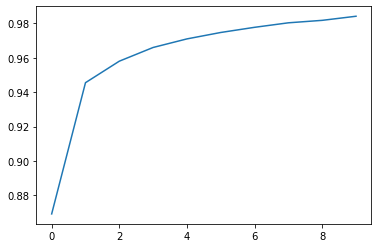

In [ ]:
#Plotting the Accuracy
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
#Predicting the values
predicted_values = model.predict(X_test[:10])
print(np.argmax(predicted_values,axis = 1))

[7 2 1 0 4 1 4 9 5 9]


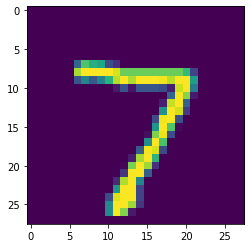

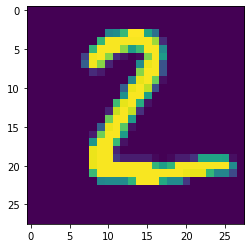

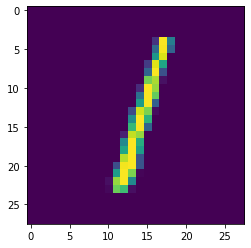

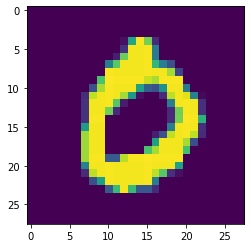

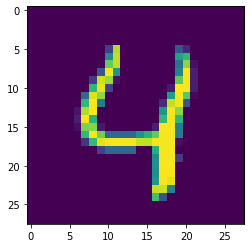

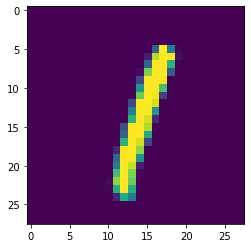

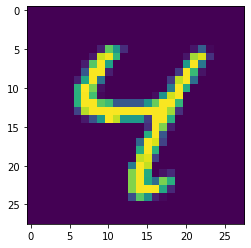

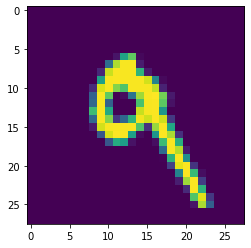

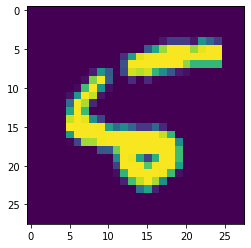

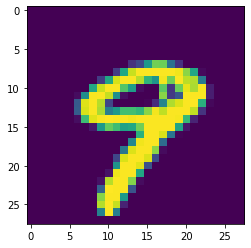

In [ ]:
#Plotting the predicted values to check the prediction
for i in range(0,10):
  image = X_test[i]
  image = np.array(image,dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()